<font size = 3> <b> Упр.1 </b> </font> Сделать таблицу (center len и тому подобное) с двумя колонками. Первая выровнена по левой границе, а вторая по центру. Причем название колонок центрированы. Для упрощения ширину колонок можно считать известной. Например:

In [1]:
#  Имя   Баллы
#Сергей   85
#Анна     91
#Андрей   88

In [2]:
#Ширина колонки
col_len=7

grades = "Имя".center(col_len) + "Баллы".center(col_len) +"\n"

grades +="Сергей".ljust(col_len) + "85".center(col_len) +"\n"
grades +="Анна".ljust(col_len) + "91".center(col_len) +"\n"
grades +="Андрей".ljust(col_len) + "88".center(col_len) +"\n"

print(grades)

  Имя   Баллы 
Сергей    85  
Анна      91  
Андрей    88  



<font size = 3> <b> Упр.2 </b> </font> 
Вычислить и нарисовать скользящее среднее по нескольким дням. Обычное среднее, т.е. сумма деленная на количество. Если подать команду (plot) в той же ячейке, то будет обе кривые на графике.

In [3]:
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
#Сначала достанем значения
prices=[]
dates=[]

with open("./files/MTLRP_201101_211031.txt") as fdata:
    lines = fdata.readlines()

for line in lines[1:]:
    fields = line.split(',')
    if len(fields) < 9:
        break
        
    date = fields[2]
    price = fields[4]
    
    year, month, day = int(date[:4]), int(date[4:6]), int(date[6:8])
    
    date = dt.date( year = year, month = month, day = day)
    
    dates.append(date)
    prices.append(price)
    
prices = [float(p) for p in prices]

In [5]:
#За сколько последних дней брать скользящее среднее
days_num = 5

In [6]:
slid_mean=[]
for i in range(days_num,len(prices)):
    slid_mean.append( sum(prices[i - days_num : i])/days_num )
    

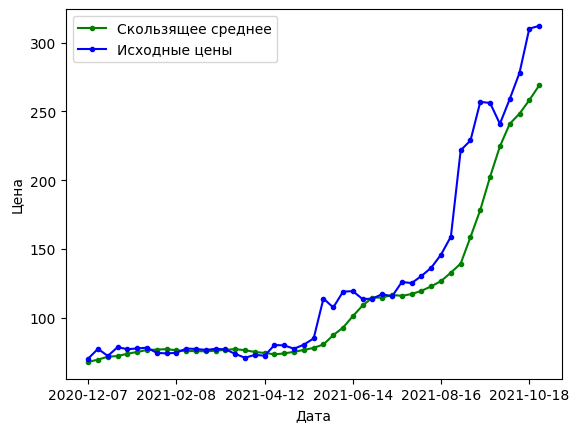

In [7]:
plt.plot( dates[days_num:], slid_mean, 'g.-', label='Скользящее среднее');
plt.plot( dates[days_num:], prices[days_num:], 'b.-', label='Исходные цены');
plt.xlabel( "Дата" ); # Задаем название для оси абсцисс.
plt.ylabel( "Цена"); # Задаем название для оси ординат.
plt.xticks(dates[days_num::len(slid_mean)//5]);

plt.legend();

<font size = 3> <b> Упр.3 </b> </font> В чём ошибка? Как исправить?

In [8]:
import re

In [9]:
s = "Маша Катя  Даша     Лена"
re.split(" *", s) #Ноль или более повторений " " - между каждым символом ноль пробелов

['',
 'М',
 'а',
 'ш',
 'а',
 '',
 'К',
 'а',
 'т',
 'я',
 '',
 'Д',
 'а',
 'ш',
 'а',
 '',
 'Л',
 'е',
 'н',
 'а',
 '']

In [10]:
s = "Маша Катя  Даша     Лена"
re.split(" +", s) #Одно повторение или более

['Маша', 'Катя', 'Даша', 'Лена']

<font size = 3> <b> Упр.4 </b> </font> 
Как извлечь название групп? Должно получиться ['часы', 'минуты', 'секунды', 'words']

In [11]:
s = '(?P<часы>[0-9][0-9]):(?P<минуты>[0-9][0-9]):(?P<секунды>[0-9][0-9])|(?P<words>[abcd]+)'

In [13]:
re.findall("\?P<([а-я]+|[a-z]+)>", s) 
#Это выражение достает слово "word" из ?P<word>

['часы', 'минуты', 'секунды', 'words']